In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw_kernels import SVR, RBF, Polynomial, \
    KernelizedRidgeRegression

In [2]:
df = pd.read_csv("sine.csv")

X = df[["x"]].values
y = df[["y"]].values

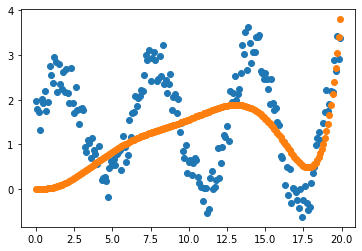

In [3]:

plt.scatter(X, y)
krr_p = KernelizedRidgeRegression(kernel=Polynomial(M = 7), lambda_=1000000)
krr_p.fit(X, y)
y_kkr = krr_p.predict(X)
plt.scatter(X, y_kkr)
plt.show()
    

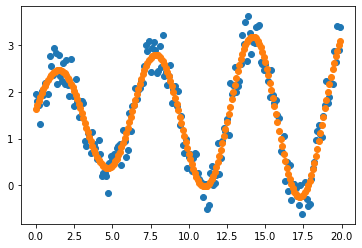

In [4]:
plt.scatter(X, y)
krr_p = KernelizedRidgeRegression(kernel=RBF(sigma = 2), lambda_=0.1)
krr_p.fit(X, y)
y_kkr = krr_p.predict(X)
plt.scatter(X, y_kkr)
plt.show()

ValueError: Rank(A) < p or Rank([P; A; G]) < n

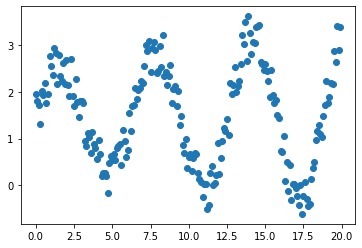

In [5]:
plt.scatter(X, y)
krr_p = SVR(kernel=Polynomial(M = 7), lambda_=0.1, epsilon=0.1)
krr_p.fit(X, np.transpose(y)[0])
y_kkr = krr_p.predict(X)
plt.scatter(X, y_kkr)
plt.show()

     pcost       dcost       gap    pres   dres
 0:  1.6691e+02 -5.6850e+04  6e+04  5e-13  2e-13
 1: -7.4621e+02 -8.5404e+03  8e+03  1e-13  2e-13
 2: -3.6928e+03 -5.0763e+03  1e+03  9e-14  2e-13
 3: -4.1999e+03 -4.6140e+03  4e+02  3e-13  1e-13
 4: -4.3122e+03 -4.5078e+03  2e+02  2e-13  1e-13
 5: -4.3704e+03 -4.4522e+03  8e+01  1e-13  1e-13
 6: -4.3966e+03 -4.4258e+03  3e+01  5e-13  1e-13
 7: -4.4064e+03 -4.4157e+03  9e+00  3e-13  2e-13
 8: -4.4104e+03 -4.4117e+03  1e+00  6e-14  2e-13
 9: -4.4109e+03 -4.4111e+03  2e-01  2e-13  2e-13
10: -4.4110e+03 -4.4110e+03  1e-02  1e-13  2e-13
11: -4.4110e+03 -4.4110e+03  2e-04  2e-13  2e-13
Optimal solution found.


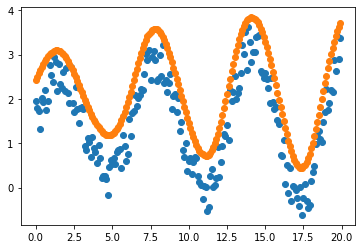

In [6]:
plt.scatter(X, y)
krr_p = SVR(kernel=RBF(sigma = 2), lambda_=0.01, epsilon=0.01)
krr_p.fit(X, np.transpose(y)[0])
y_kkr = krr_p.predict(X)
plt.scatter(X, y_kkr)
plt.show()